# Solar Challenge:Week0
## Importing Dependencies


In [42]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Loading the data

In [43]:
Benin = pd.read_csv("../data/benin-malanville.csv")
print(Benin.shape)
Benin.head()

(525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


## 1. Summary Statistics & Missing-Value Report

In [41]:
print ("An overview of the dataset: the first 5 rows")
Benin.head()

An overview of the dataset: the first 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [ ]:
print ("An overview of the dataset: the last 5 rows")
Benin.tail()

An overview of the dataset: the last 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN
525599,2022-08-09 00:00,-5.5,-0.1,-5.7,0.0,0.0,23.1,98.3,1.2,1.6,0.3,124.1,5.9,996,0,0.0,23.5,22.9,NaN


In [25]:
print("An overview of the dataset: a random sample of 5 rows")
Benin.sample(5)

An overview of the dataset: a random sample of 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
491746,2022-07-16 11:47,185.5,0.3,184.4,190.5,189.6,25.5,86.0,3.0,4.6,1.0,315.1,13.5,996,0,0.0,33.2,31.1,NaN
466007,2022-06-28 14:48,810.0,659.4,229.4,698.7,691.0,36.0,43.6,1.9,2.6,0.5,212.7,13.8,994,0,0.0,60.4,58.8,NaN
245827,2022-01-26 17:08,283.6,360.9,145.4,287.0,258.3,31.5,12.1,4.8,6.4,0.8,80.3,7.7,992,0,0.0,36.5,34.6,NaN
504205,2022-07-25 03:26,-1.4,-0.3,-1.4,0.0,0.0,25.5,95.6,0.0,0.0,0.0,0.0,0.0,996,0,0.0,25.0,24.3,NaN
337765,2022-03-31 13:26,898.0,307.7,579.7,867.0,746.8,41.6,4.7,2.2,3.1,0.5,125.8,12.3,989,0,0.0,67.6,55.1,NaN


In [26]:
print("An overview of the dataset: the shape of the dataset")
print(Benin.info())

An overview of the dataset: the shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600

In [27]:
Benin['Timestamp'] = pd.to_datetime(Benin['Timestamp'], errors='coerce')
print(Benin.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [28]:
print("Check for missing values:")
print(Benin.isna().sum())

Check for missing values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [29]:
#Identify columns with more than 5% missing values
threshold = 0.05 * len(Benin)
null_cols = Benin.isna().sum()[Benin.isna().sum() > threshold]
print("Columns with more than 5% missing values:")
print(null_cols)

Columns with more than 5% missing values:
Comments    525600
dtype: int64


In [30]:
print("The description of the numeric columns:")
print(Benin.describe())

The description of the numeric columns:
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000   

In [31]:
print("The description of all columns:")
print(Benin.describe(include='all'))

The description of all columns:
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.20

In [32]:
# Exact duplicate rows
dup_count = Benin.duplicated().sum()
print("Duplicate rows:", dup_count)

# Cardinality (uniqueness) for categoricals
cat_cols = Benin.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {c: Benin[c].nunique() for c in cat_cols}
print("Cardinality (categoricals):", cardinality)

Duplicate rows: 0
Cardinality (categoricals): {}


## 2. Outlier Detection & Basic Cleaning

#### Z-Score Method (|z|>3)

In [33]:
from scipy import stats

target_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
focus_cols = [c for c in target_cols if c in Benin.columns]

if focus_cols:
    z_b = np.abs(stats.zscore(Benin[focus_cols], nan_policy="omit"))
    if len(focus_cols) ==1:  #zscore returns 1D if only one column
        z_b = z_b.reshape(-1,1)
    z_outliers_mask = (z_b > 3).any(axis=1)
    print("Z-score outlier rows:", int(z_outliers_mask.sum()))
    
    # Keep only rows where all |Z| <= 3 (no outliers)
    Benin_clean = Benin.loc[~z_outliers_mask].copy()
    print("After removing Z-score outliers:", Benin_clean.shape)
else:
    print("No target columns found for Z-score analysis.")
    Benin_clean = Benin.copy()




Z-score outlier rows: 7740
After removing Z-score outliers: (517860, 19)


### Cleaning and Exporting Clean Data

In [34]:
key_cols = [c for c in ['GHI','DNI','DHI','ModA','ModB','WS','WSgust','RH','Tamb'] if c in Benin_clean.columns]
for c in key_cols:
    if Benin_clean[c].isna().any():
        Benin_clean[c] = Benin_clean[c].fillna(Benin_clean[c].median())

print("Remaining NA in key columns:")
print(Benin_clean[key_cols].isna().sum())

# Export cleaned DataFrame
Benin_clean.to_csv("../data/benin_clean.csv", index=False)
print("Cleaned dataset saved to: ../data/benin_clean.csv")

Remaining NA in key columns:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
RH        0
Tamb      0
dtype: int64
Cleaned dataset saved to: ../data/benin_clean.csv


## 3. Time Series Analysis

Plotting GHI, DNI, DHI, and Tamb vs Timestamp


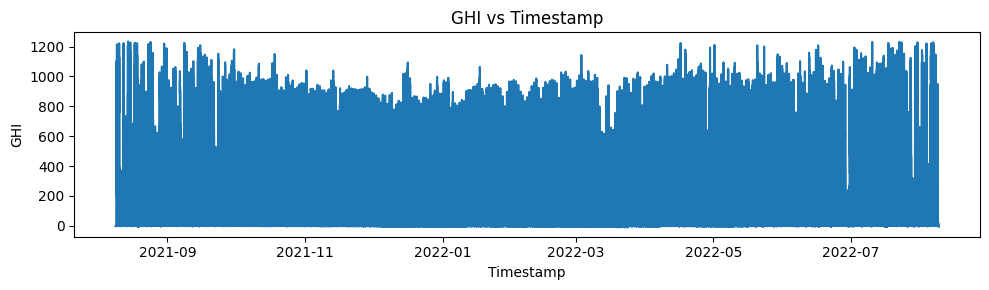

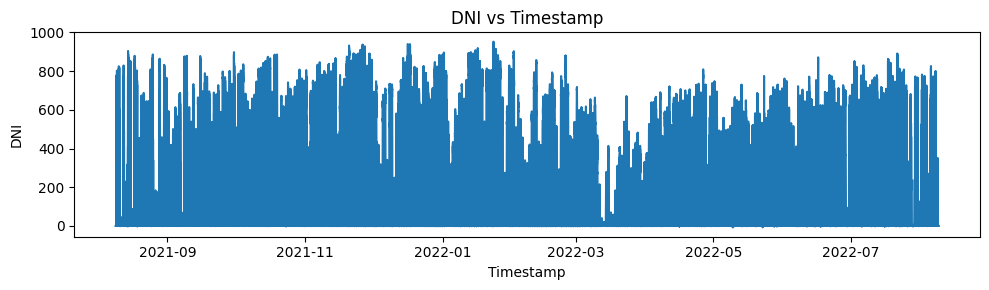

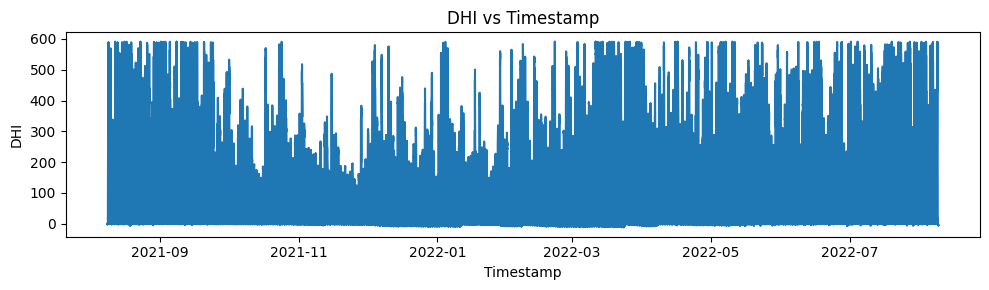

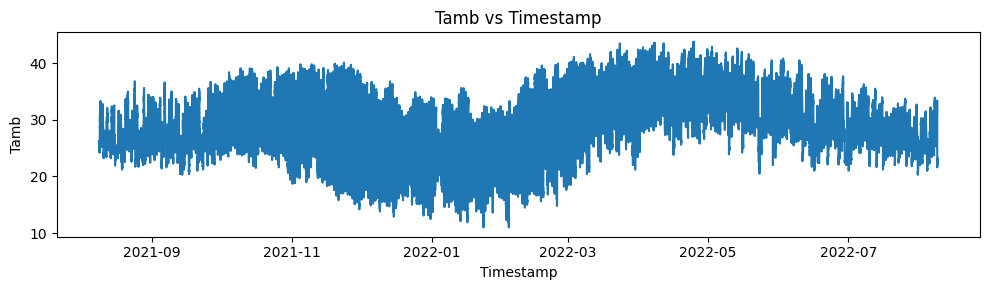

In [35]:
print("Plotting GHI, DNI, DHI, and Tamb vs Timestamp")

time_col = "Timestamp"
if time_col in Benin_clean.columns:
    for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
        if col in Benin_clean.columns:
            plt.figure(figsize=(10,3))
            plt.plot(Benin_clean[time_col], Benin_clean[col])
            plt.title(f"{col} vs Timestamp")
            plt.xlabel("Timestamp")
            plt.ylabel(col)
            plt.tight_layout()
            plt.show()
else:
    print("Timestamp column not found in dataset.")

## 4. Cleaning Impact 

Plotting average ModA and ModB by Cleaning flag


C:\Users\yamis\AppData\Local\Temp\ipykernel_16116\865755988.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Benin_clean, x='Cleaning', y=col, estimator=np.mean, ci=None)


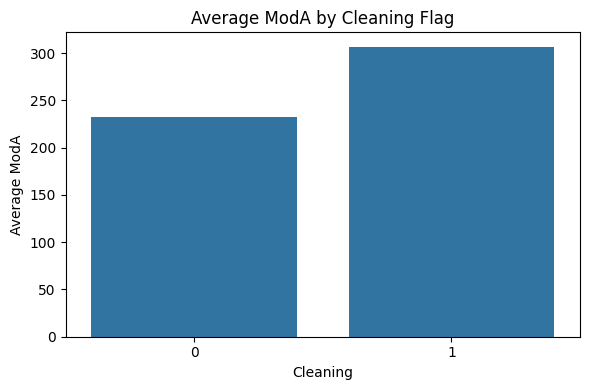

C:\Users\yamis\AppData\Local\Temp\ipykernel_16116\865755988.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Benin_clean, x='Cleaning', y=col, estimator=np.mean, ci=None)


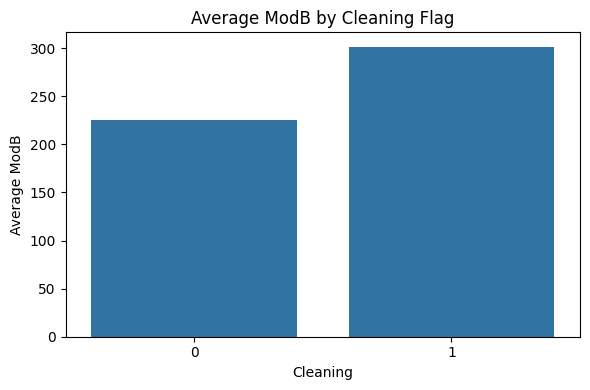

In [36]:
print("Plotting average ModA and ModB by Cleaning flag")

if 'Cleaning' in Benin_clean.columns:
    for col in ['ModA', 'ModB']:
        if col in Benin_clean.columns:
            plt.figure(figsize=(6,4))
            sns.barplot(data=Benin_clean, x='Cleaning', y=col, estimator=np.mean, ci=None)
            plt.title(f"Average {col} by Cleaning Flag")
            plt.xlabel("Cleaning")
            plt.ylabel(f"Average {col}")
            plt.tight_layout()
            plt.show()
else:
    print("No 'Cleaning' column found in dataset.")

## 5. Correlation & Relationship Analysis 

### Correlation Heatmap

,GHI,DNI,DHI,TModA,TModB
GHI,1.000000,0.891074,0.851920,0.919580,0.874701
DNI,0.891074,1.000000,0.567780,0.798472,0.762551
DHI,0.851920,0.567780,1.000000,0.827372,0.783111
TModA,0.919580,0.798472,0.827372,1.000000,0.983786
TModB,0.874701,0.762551,0.783111,0.983786,1.000000


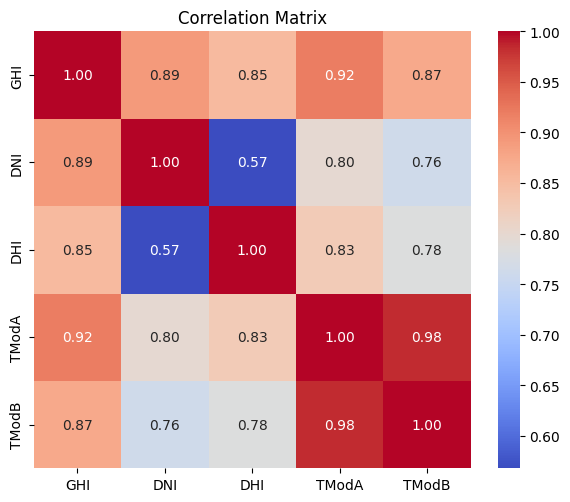

In [37]:
corr_cols = [c for c in ['GHI', 'DNI', 'DHI', 'TModA', 'TModB'] if c in Benin_clean.columns]
if corr_cols:
    corr = Benin_clean[corr_cols].corr()
    display(corr)
    plt.figure(figsize=(6,5))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()

### Scatter plot for relationships

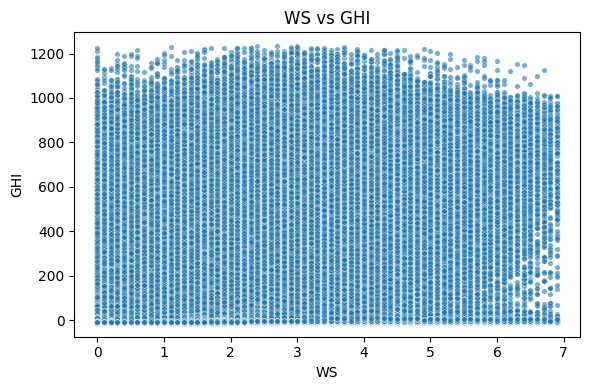

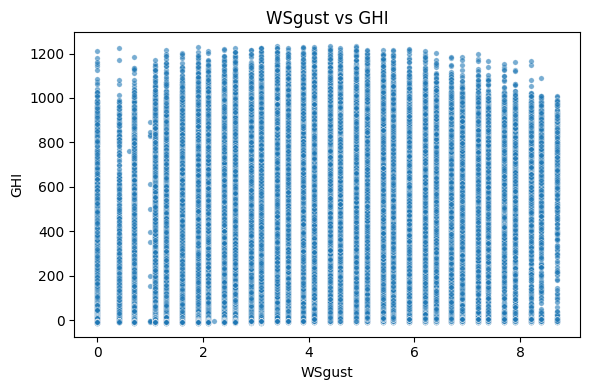

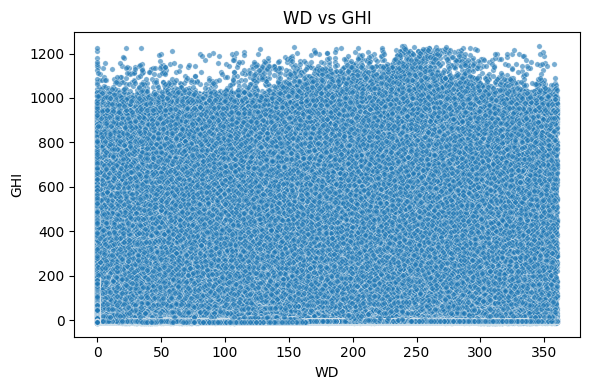

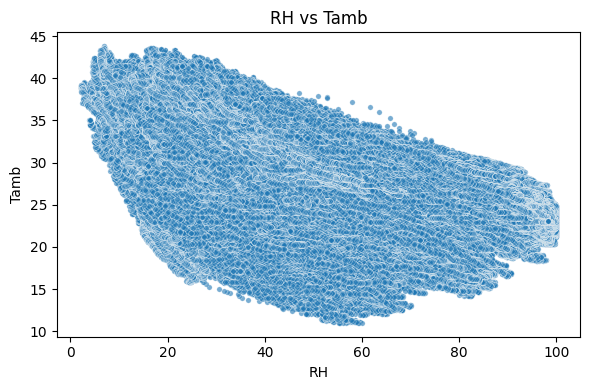

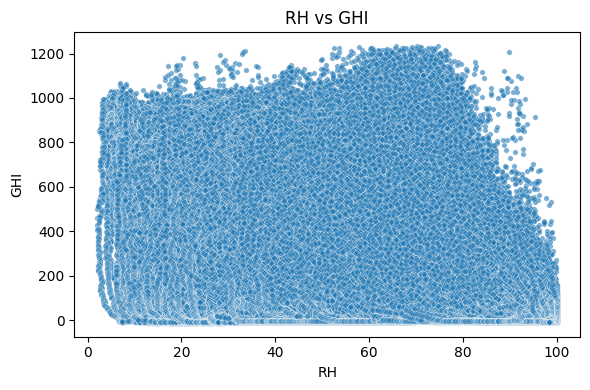

In [38]:
pairs = [
    ('WS', 'GHI', "WS vs GHI"),
    ('WSgust', 'GHI', "WSgust vs GHI"),
    ('WD', 'GHI', "WD vs GHI"),
    ('RH', 'Tamb', "RH vs Tamb"),
    ('RH', 'GHI', "RH vs GHI")
]

for x, y, title in pairs:
    if x in Benin_clean.columns and y in Benin_clean.columns:
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=Benin_clean, x=x, y=y, s=15, alpha=0.6)
        plt.title(title)
        plt.tight_layout()
        plt.show()

## 6. Wind & Distribution Analysis

Plotting wind rose and histograms for key variables


C:\Users\yamis\AppData\Local\Temp\ipykernel_16116\98794670.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ws = Benin_clean.groupby(cats)['WS'].mean().reindex(cats.cat.categories)


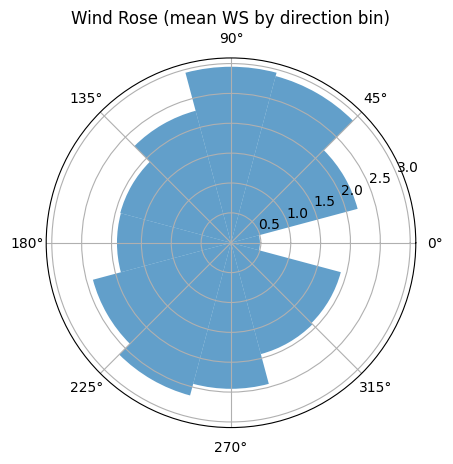

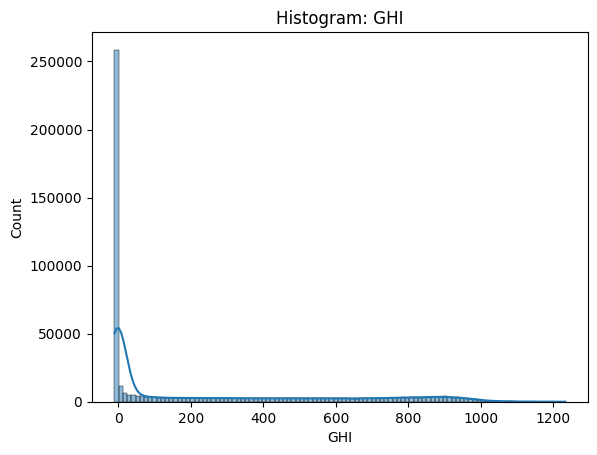

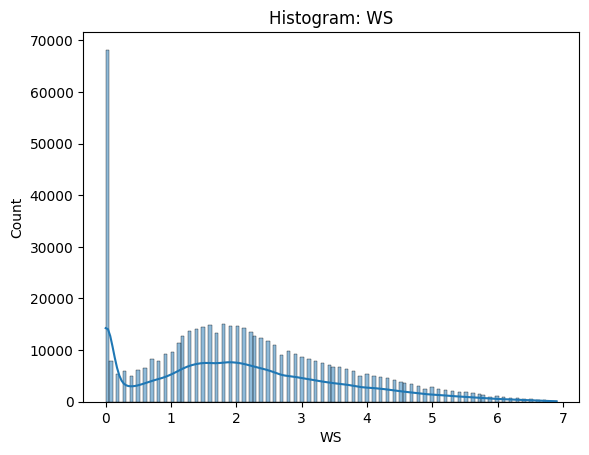

In [39]:
print("Plotting wind rose and histograms for key variables")

# Wind rose (mean WS by direction bin)
if 'WD' in Benin_clean.columns and 'WS' in Benin_clean.columns:
    bins = np.arange(0, 361, 30)
    cats = pd.cut(Benin_clean['WD'] % 360, bins=bins, right=False, include_lowest=True)
    mean_ws = Benin_clean.groupby(cats)['WS'].mean().reindex(cats.cat.categories)

    centers = np.deg2rad([interval.left for interval in mean_ws.index])
    values = mean_ws.fillna(0).values

    ax = plt.subplot(111, polar=True)
    ax.bar(centers, values, width=np.deg2rad(30), bottom=0.0, alpha=0.7)
    ax.set_title("Wind Rose (mean WS by direction bin)")
    plt.show()
else:
    print("Wind direction or speed data not found; skipping wind rose plot.")

# Histograms for GHI and WS (if they exist)
for c in ['GHI', 'WS']:
    if c in Benin_clean.columns:
        plt.figure()
        sns.histplot(Benin_clean[c], kde=True)
        plt.title(f"Histogram: {c}")
        plt.xlabel(c)
        plt.ylabel("Count")
        plt.show()

## 7. Tempreature Analysis

Examining relationship between Relative Humidity (RH) and Temperature/Solar Radiation


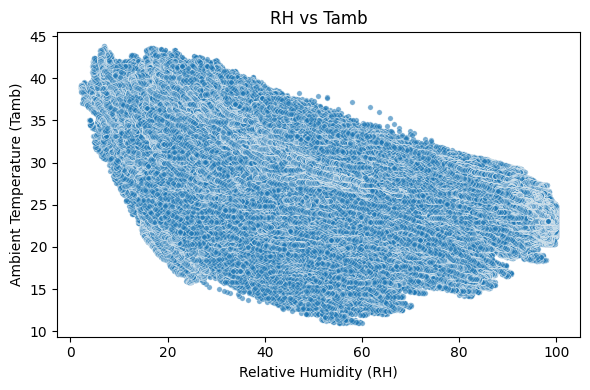

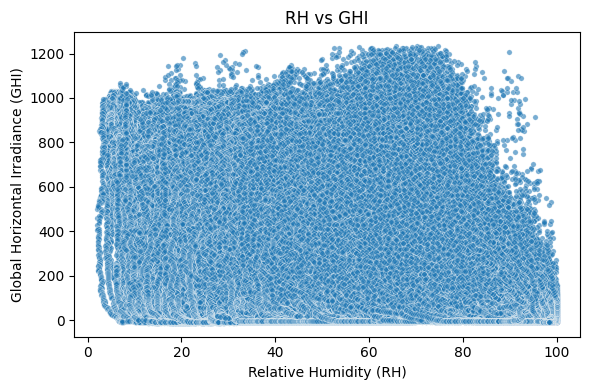

In [40]:
print("Examining relationship between Relative Humidity (RH) and Temperature/Solar Radiation")

if 'RH' in Benin_clean.columns and 'Tamb' in Benin_clean.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=Benin_clean, x='RH', y='Tamb', s=15, alpha=0.6)
    plt.title("RH vs Tamb")
    plt.xlabel("Relative Humidity (RH)")
    plt.ylabel("Ambient Temperature (Tamb)")
    plt.tight_layout()
    plt.show()

if 'RH' in Benin_clean.columns and 'GHI' in Benin_clean.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=Benin_clean, x='RH', y='GHI', s=15, alpha=0.6)
    plt.title("RH vs GHI")
    plt.xlabel("Relative Humidity (RH)")
    plt.ylabel("Global Horizontal Irradiance (GHI)")
    plt.tight_layout()
    plt.show()

## 8. Bubble Chart

Plotting bubble chart: GHI vs Tamb with bubble size = RH or BP


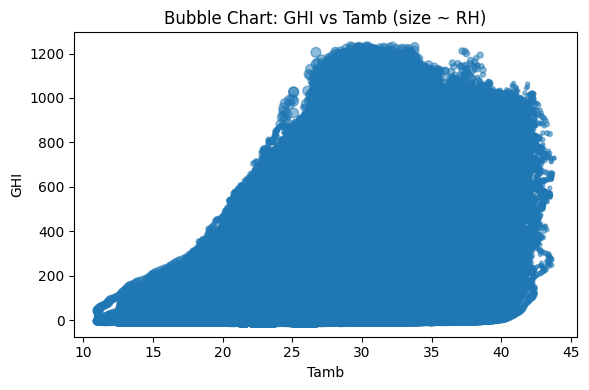

In [21]:
print("Plotting bubble chart: GHI vs Tamb with bubble size = RH or BP")

if 'GHI' in Benin_clean.columns and 'Tamb' in Benin_clean.columns:
    if 'RH' in Benin_clean.columns:
        size_col = 'RH'
    elif 'BP' in Benin_clean.columns:
        size_col = 'BP'
    else:
        size_col = None

    if size_col:
        s = Benin_clean[size_col]
        sizes = 50 * (s - s.min()) / (s.max() - s.min() + 1e-9) + 5  # scaled sizes

        plt.figure(figsize=(6,4))
        plt.scatter(Benin_clean['Tamb'], Benin_clean['GHI'], s=sizes, alpha=0.5)
        plt.xlabel("Tamb")
        plt.ylabel("GHI")
        plt.title(f"Bubble Chart: GHI vs Tamb (size ~ {size_col})")
        plt.tight_layout()
        plt.show()
    else:
        print("Neither RH nor BP found for bubble sizing; skipping bubble chart.")